# Data Cleaning in R and Python: Side-by-side Tutorial

Data cleaning is one of the most crucial steps in the analysis process. In fact, data scientists often spend a majority of their time just getting the data ready to build a model.

*So do we do this in Python or R?*
Good question! This tutorial will walk you through some basic data cleaning tasks in Python and then R. They each have their own strengths, and it's up to you to decide what works best for your project. 

## About the Data: 
<Br>
This data is an Olympics dataset that has information about atheletes, their events, and the Olympic Games for each year since 1961. We will combine this dataset with a GDP dataset to see if GDP is a predicting factor in how many Olympic medals a country wins. We will perform this analysis for the 2016 Olympics in Rio de Janeiro. 

![title](rio.jpg)

### Packages

In Python: We'll need to use numpy, pandas, seaborn and matplotlib 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In R: Set working directory and we'll need dplyr and ggplot2

![title](Screen_Shots/packages.png)

# Read in Data

In Python: Read in the csv's with pd.read_csv. We'll check what the olympics data looks like

In [5]:
olympics = pd.read_csv("athlete_events.csv")
pop = pd.read_csv("world_pop.csv")
gdp = pd.read_csv("world_gdp.csv", skiprows=3)
olympics.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In R: Very simple, we'll read in the csv's with read.csv. for the gdp we skip 3 lines to get the headers to line up correctly.

![title](Screen_Shots/read_data.png)

# Rename column

In Python: We'll use the .rename attribute to rename the NOC column to Country Code. Let's check and make sure it worked

In [6]:
olympics.rename(columns={'NOC':'Country Code'}, inplace=True)
olympics.head()

,ID,Name,Sex,Age,Height,Weight,Team,Country Code,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In Python: We also need to drop two columns in Python in preparation for the next step. We can do that with .drop

In [7]:
gdp=gdp.drop(["Indicator Name", "Indicator Code"],axis=1)
gdp.head()

,Country Name,Country Code,1960,1961,1962,1963,1964,1965,1966,1967,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,Afghanistan,AFG,5.377778e+08,5.488889e+08,5.466667e+08,7.511112e+08,8.000000e+08,1.006667e+09,1.400000e+09,1.673333e+09,...,9.843842e+09,1.019053e+10,1.248694e+10,1.593680e+10,1.793024e+10,2.053654e+10,2.004633e+10,2.005019e+10,1.921556e+10,1.946902e+10
1,Albania,ALB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.070101e+10,1.288135e+10,1.204421e+10,1.192695e+10,1.289087e+10,1.231978e+10,1.277628e+10,1.322824e+10,1.133526e+10,1.186387e+10
2,Algeria,DZA,2.723649e+09,2.434777e+09,2.001469e+09,2.703015e+09,2.909352e+09,3.136259e+09,3.039835e+09,3.370843e+09,...,1.349770e+11,1.710010e+11,1.372110e+11,1.612070e+11,2.000190e+11,2.090590e+11,2.097550e+11,2.138100e+11,1.658740e+11,1.590490e+11
3,American Samoa,ASM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.200000e+08,5.630000e+08,6.780000e+08,5.760000e+08,5.740000e+08,6.440000e+08,6.410000e+08,6.430000e+08,6.590000e+08,6.580000e+08
4,Andorra,AND,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.016972e+09,4.007353e+09,3.660531e+09,3.355695e+09,3.442063e+09,3.164615e+09,3.281585e+09,3.350736e+09,2.811489e+09,2.858518e+09


In R: In R, we will just subset the column and reassign it the name "Country.Code"

![title](Screen_Shots/rename_column.png)

# Melt

To get ready for merging with GDP, create a column for each year and GDP. make the data long. 

In Python: We'll use the .melt attribute, identify the variables that we are keeping, rename our new variable, and call the value GDP 

In [8]:
gdp2 = pd.melt(frame=gdp,id_vars=['Country Name', 'Country Code'], var_name="Year", value_name="GDP")

In [9]:
gdp2["Year"] = gdp2["Year"].astype(int)
gdp2.head()

,Country Name,Country Code,Year,GDP
0,Afghanistan,AFG,1960,5.377778e+08
1,Albania,ALB,1960,NaN
2,Algeria,DZA,1960,2.723649e+09
3,American Samoa,ASM,1960,NaN
4,Andorra,AND,1960,NaN


In R: There is also a function called melt and the arguments are similar. We will have to remove the X from all of the years using gsub. We will also need to make the year numeric which we can do with as.numeric

![title](Screen_Shots/melted.png)

# Merge with GDP

In Python: we can use pd.merge to combine the olympics and gdp datasets on Country and Year. Here are the results!

In [10]:
mm = pd.merge(olympics,gdp2,left_on=["Country Code","Year"],right_on=["Country Code", "Year"], how='left')
mm.head()

,ID,Name,Sex,Age,Height,Weight,Team,Country Code,Games,Year,Season,City,Sport,Event,Medal,Country Name,GDP
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,4.269160e+11
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,8.560550e+12
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,NaN,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,NaN,NaN
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,NaN,NaN


In R: we'll use the merge function, a little simpler than Python. here is part of that data

![title](Screen_Shots/merge_data.png)

# Filter to look at most recent olympics

In Python: We can use this notation to subset a part of the data where Year = 2016.

In [11]:
recent = mm[(mm['Year']==2016)]
recent.head()

,ID,Name,Sex,Age,Height,Weight,Team,Country Code,Games,Year,Season,City,Sport,Event,Medal,Country Name,GDP
80,22,Andreea Aanei,F,22.0,170.0,125.0,Romania,ROU,2016 Summer,2016,Summer,Rio de Janeiro,Weightlifting,Weightlifting Women's Super-Heavyweight,NaN,Romania,1.875920e+11
139,51,Nstor Abad Sanjun,M,23.0,167.0,64.0,Spain,ESP,2016 Summer,2016,Summer,Rio de Janeiro,Gymnastics,Gymnastics Men's Individual All-Around,NaN,Spain,1.237260e+12
140,51,Nstor Abad Sanjun,M,23.0,167.0,64.0,Spain,ESP,2016 Summer,2016,Summer,Rio de Janeiro,Gymnastics,Gymnastics Men's Floor Exercise,NaN,Spain,1.237260e+12
141,51,Nstor Abad Sanjun,M,23.0,167.0,64.0,Spain,ESP,2016 Summer,2016,Summer,Rio de Janeiro,Gymnastics,Gymnastics Men's Parallel Bars,NaN,Spain,1.237260e+12
142,51,Nstor Abad Sanjun,M,23.0,167.0,64.0,Spain,ESP,2016 Summer,2016,Summer,Rio de Janeiro,Gymnastics,Gymnastics Men's Horizontal Bar,NaN,Spain,1.237260e+12


In R: The filter function from dplyr is one of the best ways to filter in R.

![title](Screen_Shots/filter.png)

# How many medals did each country win?

In Python: replace null values with a 0 for 0 medals, and replace all the words with value=1.

In [12]:
recent["Medal"].fillna(0,inplace=True)

/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:6130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [13]:
recent["Medal"] = recent["Medal"].replace(to_replace ="Gold", value =1)
recent["Medal"] = recent["Medal"].replace(to_replace ="Silver", value =1)
recent["Medal"] = recent["Medal"].replace(to_replace ="Bronze", value =1)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/p

In R: We'll use gsub again to replace any instance of gold, silver, or bronze with a 1 and any missing values with 0. We'll need to change those to numeric again.

![title](Screen_Shots/medals.png)

# Number of Medals won in 2016 by Country

In Python: python's groupby function is a great way to get the total numer of medals, average age, and average GDP by mean. then we created a new dataframe with all of those results

In [14]:
medal_count = recent.groupby(['Country Code'])["Medal"].sum()
avg_age = recent.groupby(['Country Code'])["Age"].mean()
gdp = recent.groupby(['Country Code'])["GDP"].mean()

In [15]:
country = pd.concat([medal_count, avg_age, gdp], axis=1)
country = country.reset_index()
country.head()

,Country Code,Medal,Age,GDP
0,AFG,0,24.666667,1.946902e+10
1,ALB,0,23.666667,1.186387e+10
2,ALG,2,23.959459,NaN
3,AND,0,26.000000,2.858518e+09
4,ANG,0,27.461538,NaN


In R: We'll use piping structure in dplyr to group by Country and summarize. This is way more efficient in R. The sorted table is displayed below

![title](Screen_Shots/pipe.png)

![title](Screen_Shots/sorted.png)

In R:

# Graph

In Python: Use seaborn to make a plot 

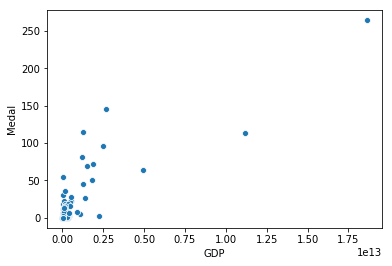

In [17]:
sns.scatterplot(x="GDP", y="Medal", data=country)

In R: Use ggplot package to make a scatterplot of GDP and medals won

![title](Screen_Shots/plot2.png)

In R:

# Conclusion

As you can see, there are many different ways to clean data in R and Python. Some things (naming columns, importing packages,etc.) are easier in Python, while others (filtering, sorting, visualization, etc.) are easier in R. 
<br>
<br>
The thing that would be difficult is doing data cleaning with both R and Python the same project. R is designed for statistical analyses, whereas python is a little bit more versatile and widely used today.
<br>
<br>
So depending on what you're going for, it doesn't matter a lot whether you use R or Python. Just pick one and stick with it. Happy data cleaning!